# INTERNAL LOADINGS DEVELOPED IN STRUCTURAL MEMBERS

## Objectives

- To show how to determine the internal loadings in a structural member at specified and arbitrary points.
- To provide both analytical and a graphical procedure for constructing shear and moment diagrams for a member or frame.

## Internal Loadings at a Specified Point

The internal load at a specified point in a member can be determined by using the **method of sections**.

In general, the loading for a coplanar structure will consists of a normal force $\mathbf{N}$, shear force $\mathbf{V}$, and bending moment $\mathbf{M}$. These three loadings represent the *resultants* of the *stress distribution* acting over the member's cross-sectional area at the section. Once they are known, the magnitude of the stress can be determined and this can be used to design the member.

<img src ="iload.png"/>

### Sign Convention

- A positive normal force tends to elongate the segment.
<img src = "normal.png"/>
- A positive shear tends to rotate the segment clockwise.
<img src = "shear.png"/>
- A positive bending moment tends to bend the segment concave upward.
<img src = "moment.png"/>


## Shear and Moment Functions

- The design of a beam requires a detailed knowlegde of the *variations* of the internal shear force V and moment M acting at each point along the axis of the beam.
- The following procedure provides a method for determining the variation of shear and moment in a beam as a function of position $x$.

**Support Reactions**

- Determine the support reactions on the beam and resolve all the external forces into components acting perpendicular and parallel to the beam's axis.

**Shear and Moment Functions**

- Specify separate coordinates $x$ and associated origins, extending into regions of the beam between concentrated forces and/or couple moments, or where there is a discontinuity of distributed loading.
- Section the beam at each distance $x$, and draw the free-body diagram, where $V$ and $M$ are shown acting in their positive directions.
- $V$ is obtained from $\sum{F_y} = 0$, and $M$ is obtained by summing moments about the point $S$ located at the section, $\sum{M_S} = 0$.
- The results can be checked by noting that $\frac{dM}{dx} = V$ and $\frac{dV}{dx} = w$, where $w$ is positive when it acts upward, away from the beam.

### Example 1

Determine the shear and moment in the beam shown as a function of $x$.

<img src ="ex1.png"/>

#### Support Reactions

<img src ="ex1fbd.png"/>

In [1]:
# Calculate W in kN

W = 10*3/2
W

15.0

In [2]:
# Calculate R in kN

R = W
R

15.0

In [3]:
# Calculate M_R in kN-m.

M_R = W*(2/3)*3
M_R

30.0

#### Shear and  Moment Functions

<img src = "ex1fbd2.png"/>

In [8]:
# Shear equation

import sympy as sp
x = sp.symbols("x")

V = sp.symbols("V")

y = (10*x/3)

V = sp.solve(R - (1/2)*y*x -V,V)
V

[15.0 - 1.66666666666667*x**2]

In [9]:
# Moment function

M = sp.symbols("M")

M = sp.solve(-M_R +15*x -(1/2)*y*x*(x/3)-M, M)
M

[-0.555555555555556*x**3 + 15.0*x - 30.0]

In [11]:
### Checking

V_eq = sp.diff(-0.5556*x**3+15*x -30)
V_eq

15 - 1.6668*x**2

In [12]:
w = sp.diff(15-1.668*x**2)
w

-3.336*x

### Diagrams

In [13]:
import numpy as np
import matplotlib.pyplot as plt

X = []
V = []
M = []

l = np.linspace(0, 3, 100)

for x in l:
    v = 15.0-1.6667*x**2
    m = -0.5556*x**3+15*x-30
    
    X.append(x)
    V.append(v)
    M.append(m)

#### Shear Diagram

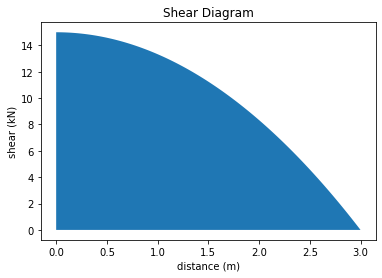

In [14]:
plt.title("Shear Diagram")
plt.xlabel("distance (m)")
plt.ylabel("shear (kN)")
plt.stackplot(X,V)

#### Moment Diagram

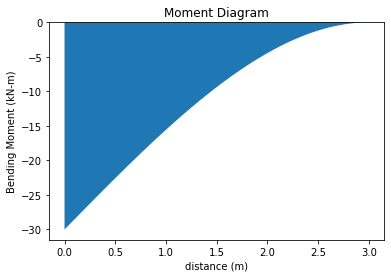

In [15]:
plt.title("Moment Diagram")
plt.xlabel("distance (m)")
plt.ylabel("Bending Moment (kN-m)")
plt.stackplot(X,M)

## Example 2

Determine the shear and moment diagrams for the beam.

<img src = "ex2.png"/>

#### Support Reactions

<img src = "ex2fbd1.png"/>

In [16]:
# Calculation of W in kN

W = 30*4
W

120

In [21]:
# Calculation of R_A

R_A = sp.symbols('R_A')

R_A = sp.solve(R_A*8-W*6-30*4, R_A)
R_A

[105]

In [22]:
R_A = 105

In [23]:
# Calculation  of R_B

R_B = sp.symbols('R_B')

R_B = sp.solve(R_B*8 -30*4 - W*2, R_B)
R_B

[45]

In [24]:
R_B = 45

#### Shear and Moment Functions

**Segment AC**

<img src ="ex2fbd2.png"/>

In [25]:
# Shear function

x = sp.symbols('x')
V_AC = sp.symbols('V_AC')

w = 30*x

V_AC = sp.solve(R_A-w-V_AC, V_AC)
V_AC

[105 - 30*x]

In [26]:
# Moment function

M_AC = sp.symbols('M_AC')

M_AC = sp.solve(R_A*x-w*(x/2)-M_AC, M_AC)
M_AC

[15*x*(7 - x)]

#### Segment CB

<img src ="ex2fbd3.png"/>

In [27]:
# Shear function

V_CB = sp.symbols('V_CB')

W = 120
V_CB = sp.solve(R_A-W-30-V_CB, V_CB)
V_CB

[-45]

In [28]:
# Moment function

M_CB =sp.symbols('M_CB')

M_CB = sp.solve(R_A*x-W*(x-2)-30*(x-4)-M_CB, M_CB)
M_CB

[360 - 45*x]

### Diagrams

In [34]:
X = []
V = []
M = []

l = np.linspace(0, 8, 1000)

for x in l:
    if x < 4:
        v = 105-30*x
        m = 15*x*(7-x)
    elif x > 4:
        v = -45
        m = 360-45*x
        
    X.append(x)
    V.append(v)
    M.append(m)

#### Shear Diagram

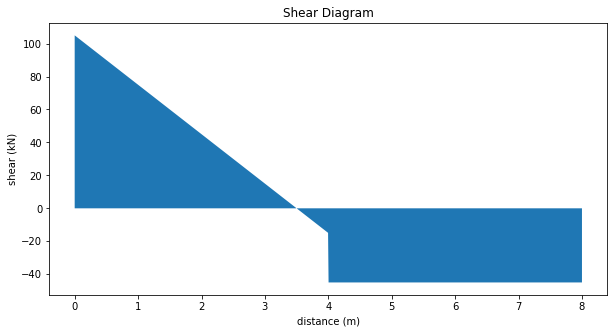

In [35]:
plt.figure(figsize =(10,5))
plt.title("Shear Diagram")
plt.xlabel("distance (m)")
plt.ylabel("shear (kN)")
plt.stackplot(X,V)

#### Moment Diagram

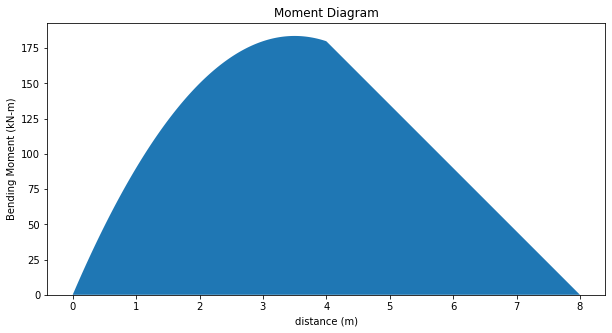

In [36]:
plt.figure(figsize =(10,5))
plt.title("Moment Diagram")
plt.xlabel("distance (m)")
plt.ylabel("Bending Moment (kN-m)")
plt.stackplot(X,M)